# Importacion de librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as sm
import numpy as np

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
np.random.seed(1234)

In [5]:
messi_csv = pd.read_csv('messi_barca.csv', encoding = "ISO-8859-1", delimiter=',')  
messi_csv

,Season,Age,Competition,Matches Played,Starts,Minutes played,Goals scored,Assists,PK,PKatt,CrdY,CrdR,Goal/90,Ast/90,G+A/90,G-PK/90,G+A-PK/90
0,2004-2005,17,Champions League,1,1,90,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
1,2004-2005,17,La Liga,7,0,70,1,0,0,0,0,0,1.29,0.00,1.29,1.29,1.29
2,2005-2006,18,Champions League,6,4,322,1,1,0,0,0,0,0.28,0.28,0.56,0.28,0.56
3,2005-2006,18,La Liga,17,11,911,6,3,0,0,2,0,0.59,0.30,0.89,0.59,0.89
4,2006-2007,19,Champions League,5,4,385,1,0,0,0,1,0,0.23,0.00,0.23,0.23,0.23
5,2006-2007,19,La Liga,26,23,1983,14,3,0,0,2,0,0.64,0.14,0.77,0.64,0.77
6,2007-2008,20,Champions League,9,9,728,6,2,1,1,2,0,0.74,0.25,0.99,0.62,0.87
7,2007-2008,20,La Liga,27,23,1973,10,12,4,4,2,0,0.46,0.55,1.00,0.27,0.82
8,2008-2009,21,Champions League,12,10,927,9,5,0,0,1,0,0.87,0.49,1.36,0.87,1.36
9,2008-2009,21,La Liga,31,27,2516,23,11,3,4,2,0,0.82,0.39,1.22,0.72,1.11


In [6]:
messi_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Season          44 non-null     object 
 1   Age             44 non-null     int64  
 2   Competition     44 non-null     object 
 3   Matches Played  44 non-null     int64  
 4   Starts          44 non-null     int64  
 5   Minutes played  44 non-null     int64  
 6   Goals scored    44 non-null     int64  
 7   Assists         44 non-null     int64  
 8   PK              44 non-null     int64  
 9   PKatt           44 non-null     int64  
 10  CrdY            44 non-null     int64  
 11  CrdR            44 non-null     int64  
 12  Goal/90         44 non-null     float64
 13  Ast/90          44 non-null     float64
 14  G+A/90          44 non-null     float64
 15  G-PK/90         44 non-null     float64
 16  G+A-PK/90       44 non-null     float64
dtypes: float64(5), int64(10), object(2)
m

# Regresion logistica

## Preparacion de datos

In [7]:
assists = messi_csv['Assists'].to_numpy()
goals_scored = messi_csv['Goals scored'].to_numpy()

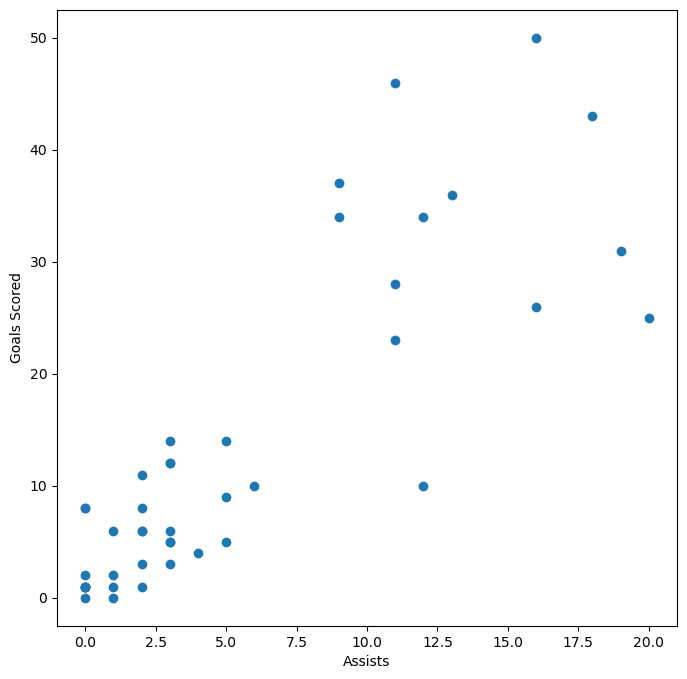

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(assists, goals_scored)
plt.xlabel('Assists')
plt.ylabel('Goals Scored')
plt.show()

In [9]:
competiciones = messi_csv['Competition']
comp = []
for c in competiciones:
    if c == 'Champions League':
        comp.append(0)
    if c == 'La Liga':
        comp.append(1)
    if c == 'Copa del Rey':
        comp.append(2)
    if c == 'Supercopa de España':
        comp.append(3)
        
labels = np.array(comp)

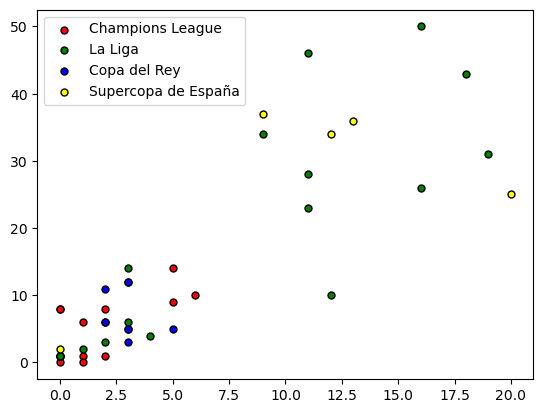

In [10]:
cdict = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}
catdict= {0:'Champions League', 1: 'La Liga', 2:'Copa del Rey', 3:'Supercopa de España'}

figure, ax = plt.subplots()

for g in np.unique(labels):
    ix = np.where(g == labels)
    ax.scatter(assists[ix], goals_scored[ix], c = cdict[g], label = catdict[g], s = 25,edgecolor='k')

ax.legend()
plt.show()

In [11]:
X = np.array(messi_csv[['Assists', 'Goals scored']])

In [12]:
X

array([[ 0,  0],
       [ 0,  1],
       [ 1,  1],
       [ 3,  6],
       [ 0,  1],
       [ 3, 14],
       [ 2,  6],
       [12, 10],
       [ 5,  9],
       [11, 23],
       [ 0,  8],
       [ 9, 34],
       [ 3, 12],
       [19, 31],
       [ 5, 14],
       [16, 50],
       [ 2,  8],
       [11, 46],
       [ 0,  8],
       [11, 28],
       [ 6, 10],
       [ 3,  5],
       [18, 43],
       [ 1,  6],
       [ 5,  5],
       [16, 26],
       [ 0,  2],
       [ 0,  1],
       [ 2, 11],
       [ 3,  5],
       [ 9, 37],
       [ 2,  1],
       [ 2,  6],
       [ 4,  4],
       [12, 34],
       [ 0,  1],
       [ 3, 12],
       [ 2,  3],
       [13, 36],
       [ 1,  0],
       [ 3,  3],
       [ 1,  2],
       [20, 25],
       [ 0,  1]], dtype=int64)

In [13]:
Y_1 = np.array(messi_csv['Assists']>7.5)

In [14]:
Y_1

array([False, False, False, False, False, False, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False])

In [15]:
Y_1 = Y_1.astype(int)

In [16]:
Y_1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

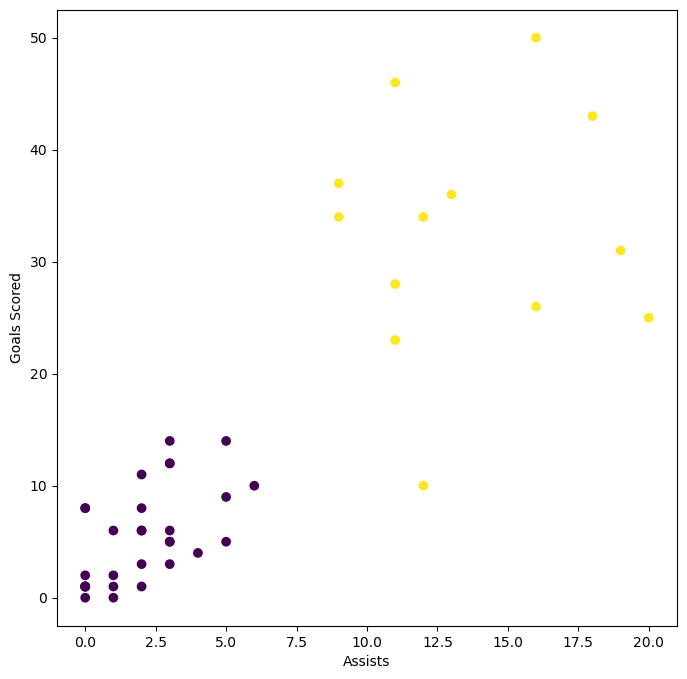

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(assists, goals_scored, c=Y_1)
plt.xlabel('Assists')
plt.ylabel('Goals Scored')
plt.show()

In [18]:
Y_2 = np.array(messi_csv['Competition'] == 'La Liga')

In [19]:
Y_2 = Y_2.astype(int)

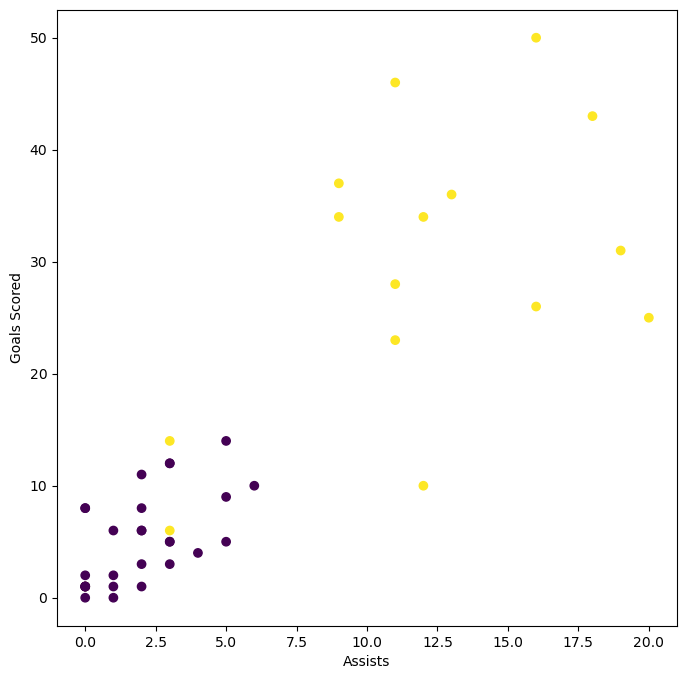

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(assists, goals_scored, c=Y_2)
plt.xlabel('Assists')
plt.ylabel('Goals Scored')
plt.show()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_1, test_size=0.2, random_state=1234, shuffle=True)

In [22]:
X.shape

(44, 2)

In [23]:
Y_1.shape

(44,)

In [24]:
x_train.shape

(35, 2)

In [25]:
x_test.shape

(9, 2)

## Aplicacion del modelo

In [26]:
clasificador = linear_model.LogisticRegression()

In [27]:
clasificador.fit(x_train, y_train)

LogisticRegression()

In [28]:
y_pred_test = clasificador.predict(x_test)

In [29]:
y_pred_test 

array([0, 1, 0, 0, 0, 1, 0, 0, 0])

In [30]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0])

## Matriz de confusion - datos de validacion

In [31]:
cm = confusion_matrix(y_test, y_pred_test)

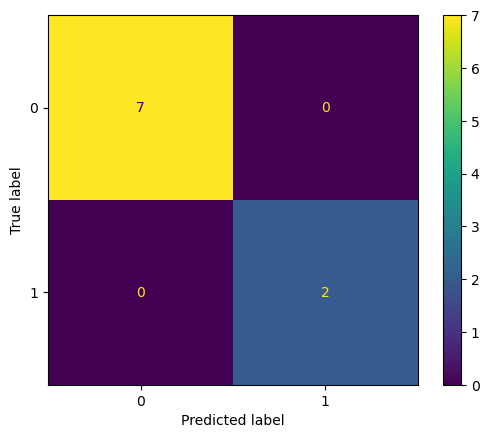

In [32]:
cm_display = ConfusionMatrixDisplay(cm).plot() # muestra la matriz 7 y 2 son ok

In [33]:
clasificador.score(x_test, y_test) #muestra una prediccion perfecta

1.0

In [34]:
clasificador.score(x_train, y_train)

1.0

## Modelo no linealmente separable

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_2, test_size=0.2, random_state=1234, shuffle=True)

In [36]:
clasificador_nls = linear_model.LogisticRegression()

In [37]:
clasificador_nls.fit(x_train, y_train)

LogisticRegression()

In [38]:
y_pred_test = clasificador.predict(x_test)

In [39]:
y_pred_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0])

In [40]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0])

In [41]:
y_pred_train = clasificador.predict(x_train)

In [42]:
y_pred_train

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [43]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

## Matriz de confusion - datos de entrenamiento

In [44]:
cm_nls = confusion_matrix(y_train, y_pred_train)

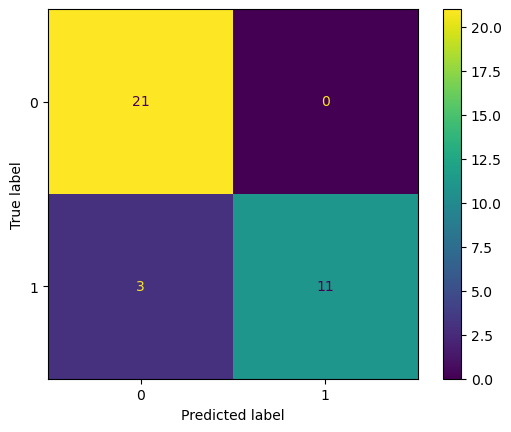

In [45]:
cm_nls_display = ConfusionMatrixDisplay(cm_nls).plot()

In [46]:
clasificador_nls.score(x_test, y_test)

1.0

In [47]:
clasificador_nls.score(x_train, y_train)

0.9142857142857143

# Clasificacion del espacio 2D

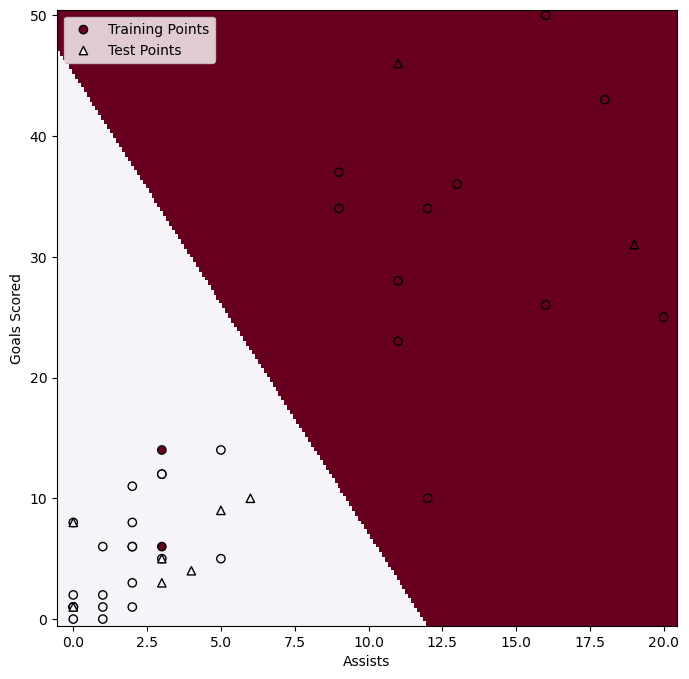

In [48]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5,  X[:, 0].max() + 0.5
y_min, y_max =  X[:, 1].min() - 0.5,  X[:, 1].max() + 0.5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clasificador.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
# plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = "PuRd", shading ='auto')

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors="k", cmap="PuRd",label='Training Points')
# Plot also the testing points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred_test, edgecolors="k", cmap="PuRd",marker="^",label='Test Points')
plt.legend(loc="upper left")
plt.xlabel("Assists")
plt.ylabel("Goals Scored")
plt.show()

# Regresion lineal

In [49]:
PK = messi_csv['PK'].to_numpy()
PKatt = messi_csv['PKatt'].to_numpy()

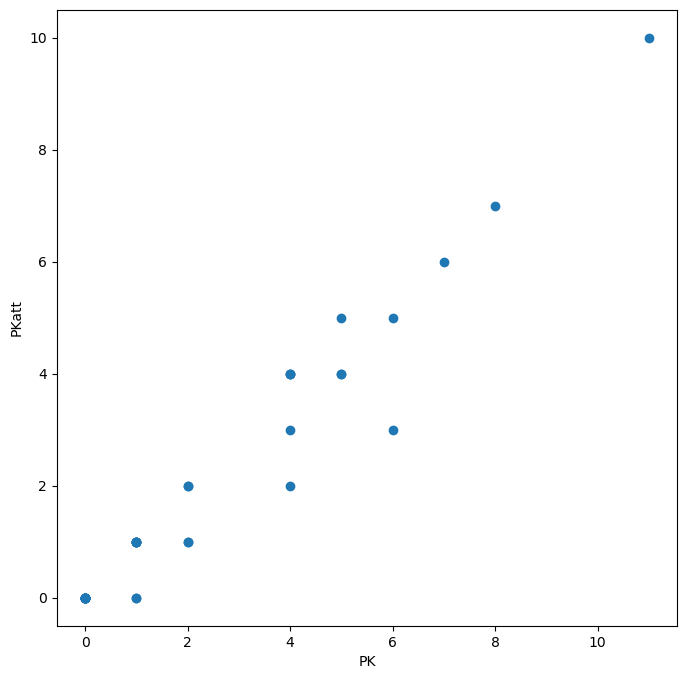

In [50]:
plt.figure(figsize=(8,8))
plt.scatter(PKatt, PK)
plt.xlabel('PK')
plt.ylabel('PKatt')
plt.show()

In [51]:
x_train, x_test, y_train, y_test = train_test_split(PKatt, PK, test_size=0.2, random_state=1234, shuffle=True)

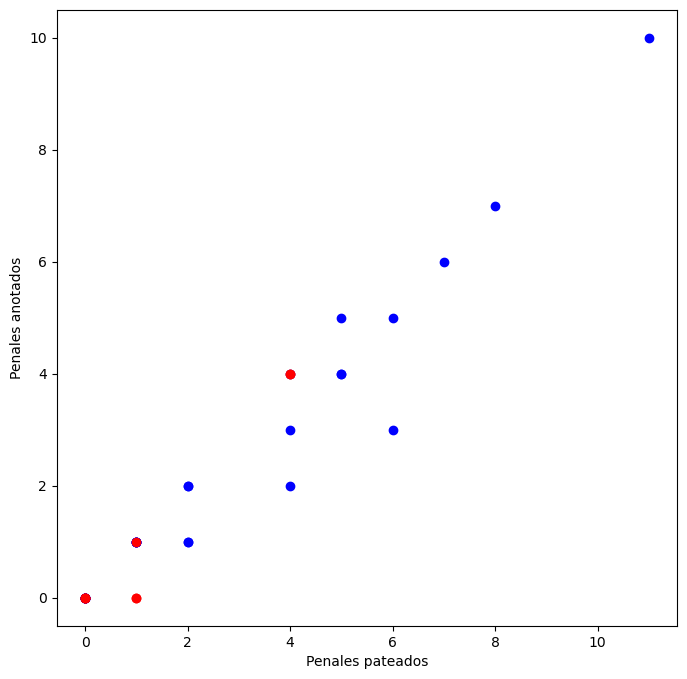

In [52]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='blue')
plt.scatter(x_test, y_test, c='red')
plt.xlabel('Penales pateados')
plt.ylabel('Penales anotados')
plt.show()

# Modelo de regresion lineal

In [53]:
linear_regressor = linear_model.LinearRegression()

In [54]:
x_train

array([ 4,  6,  0,  5,  5,  2,  0,  0,  1,  0,  1,  4,  0,  1,  0,  0,  0,
        0,  2,  0,  6,  4,  0,  0,  2,  0,  1,  7,  0,  1, 11,  0,  2,  5,
        8], dtype=int64)

In [55]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [56]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [57]:
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [58]:
y_pred_test = linear_regressor.predict(x_test)

## Predicciones sobre x_test

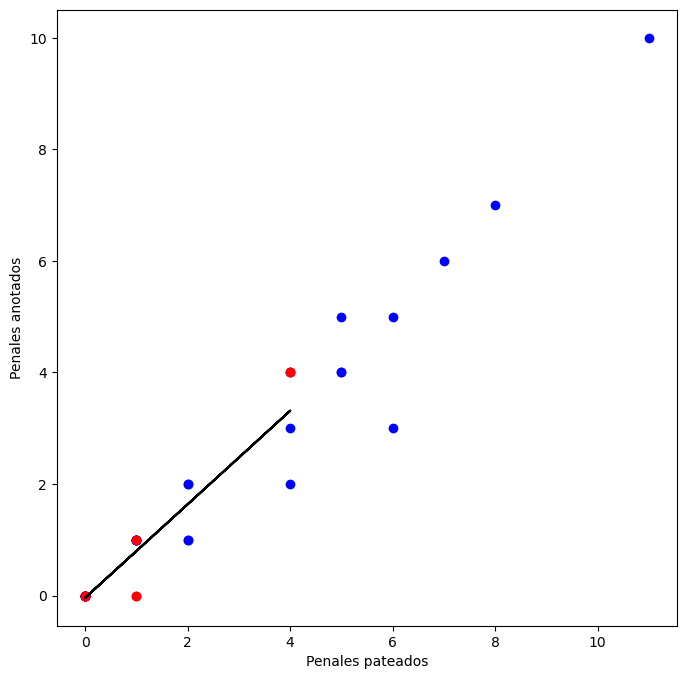

In [59]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='blue')
plt.scatter(x_test, y_test, c='red')
plt.plot(x_test, y_pred_test, c='black')
plt.xlabel('Penales pateados')
plt.ylabel('Penales anotados')
plt.show()

In [60]:
y_pred_train = linear_regressor.predict(x_train)

## Predicciones sobre x_train

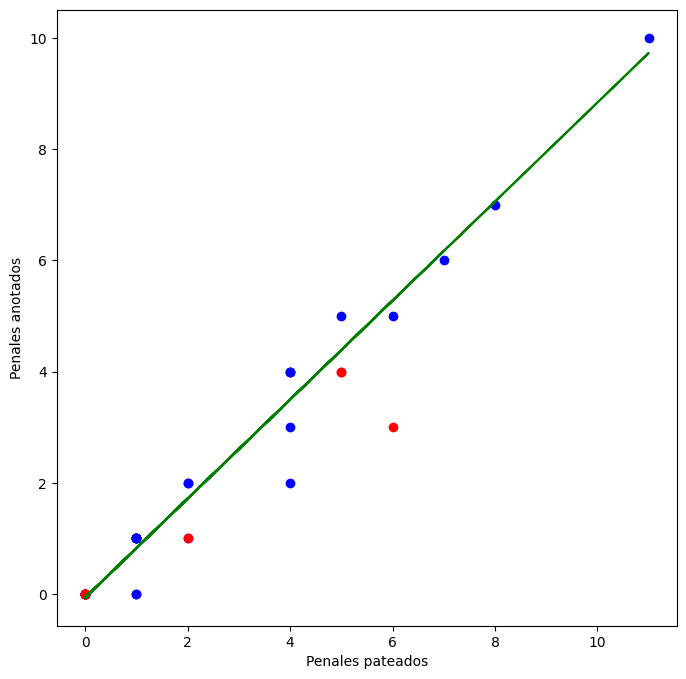

In [68]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='blue')
plt.scatter(x_test, y_test, c='red')
plt.plot(x_train, y_pred_train, c='green')
plt.xlabel('Penales pateados')
plt.ylabel('Penales anotados')
plt.show()